# Dan Journic's Phase 2 Project
This is where I will be writing my code for the Flatiron School's Phase 2 Project. And then later editing and revising. So let's get started:
Step 1) import all the libraries necessary for linear regression and graphing

In [1]:
import pandas as pd
import numpy as np
# Setting random seed for reproducibility, not sure if I'll need it.
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from itertools import combinations

So before I get too into the problem itself, I wanted to look at the data first.

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So the problem here is self-defined (whatever I want it to be). My gut is to take the viewpoint of a potential buyer, and try to predict if the price they're paying is a good deal or not. Almost like the Car-Fax of houses.

It's WAY too much data to really make any sense of it graphically. So I'll need to trim down my data a bit. I'm pretty sure that price is going to be my predicted value, so let's put that in its own variable, and drop it from the main dataframe.

In [7]:
price=df['price']

In [8]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

What I'm noticing is that I forgot to remove the categorical variables. I should do that. I was looking at 'view'. It seems to be a grade from 0-4. And I just remembered in the project repository they give us a column set we can use, at least some of the columns they recommend we ignore. It pays to read the directions.

In [9]:
col_ign=['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [10]:
df_s1=df.drop(columns=col_ign,axis=1)

In [11]:
df_s1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


So much better. So let's try to look at that pairplot and maybe even heatmap again, since it should be much more manageable.

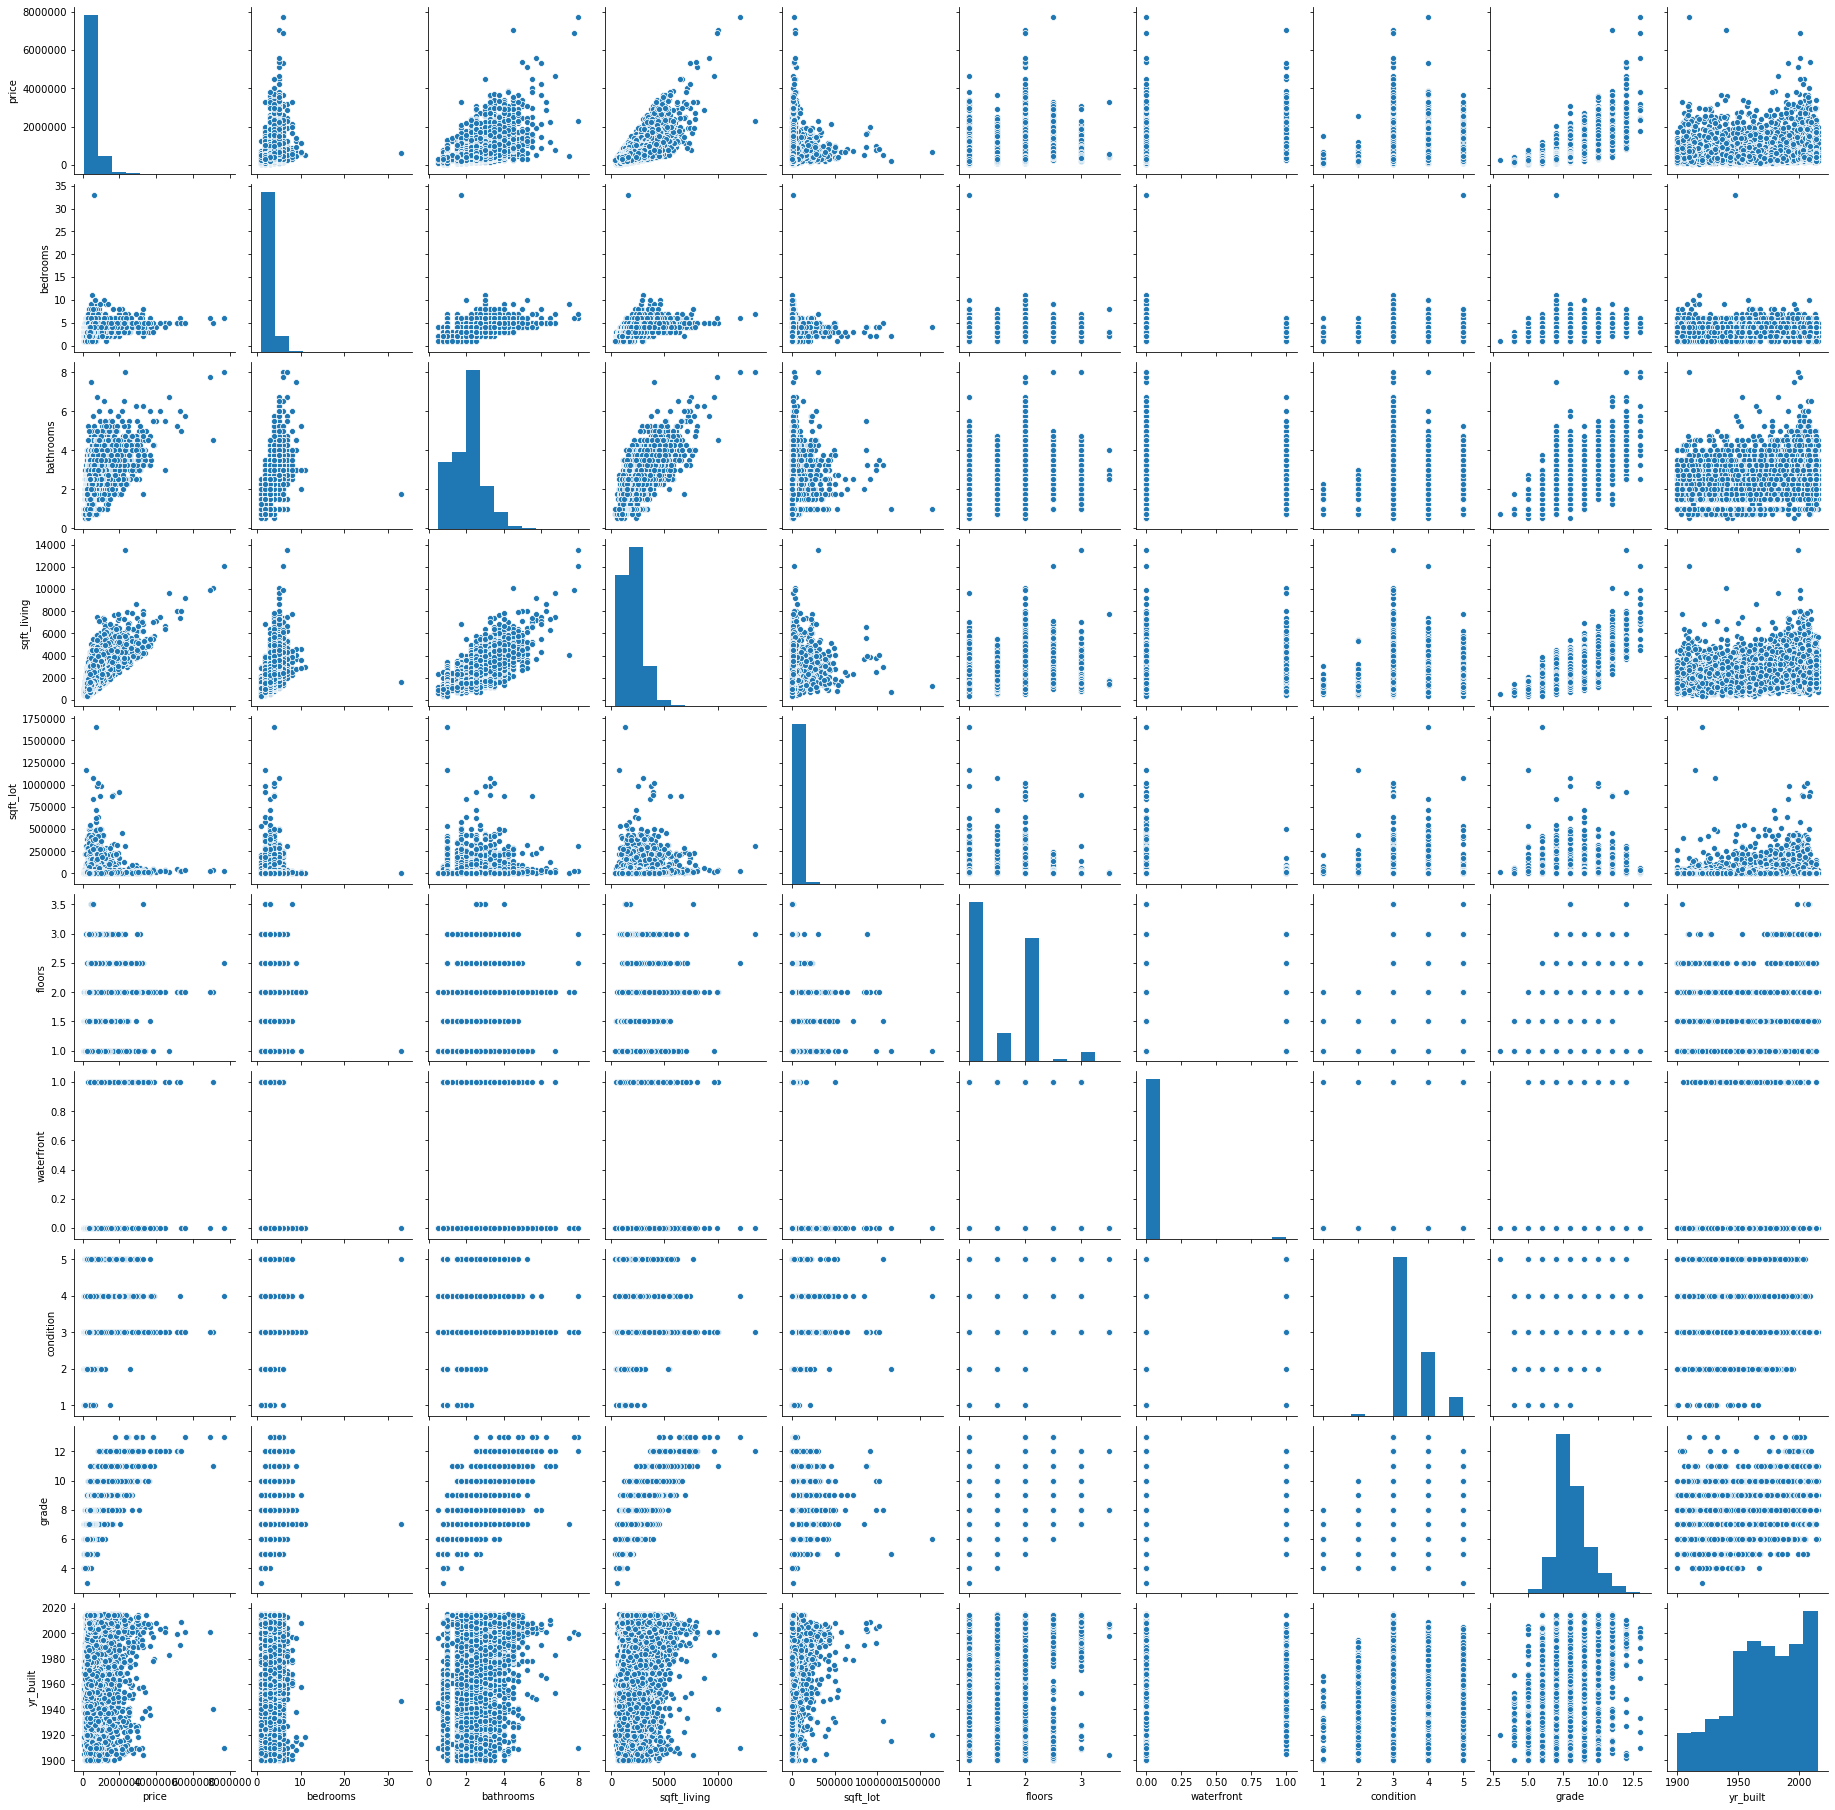

In [12]:
sns.pairplot(df_s1)

So that still took a bunch of time, and didn't yield anything too telling.

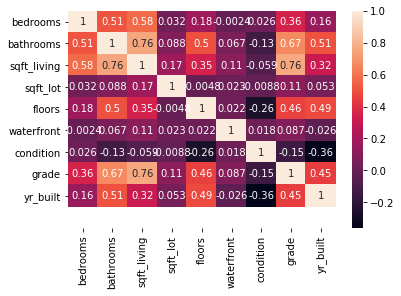

In [13]:
ax = sns.heatmap(df_s1.corr(), annot=True)

ax.set_ylim(10,0)
plt.show()

Yeah, still a lot. Well, if this were easy everyone would do it. Let's get as simple as we can and make a scatter plot with 2 variables: price and bedrooms. First, let's see what else coorelates with price best.

In [10]:
df_s1.corr().price.sort_values(ascending=False)

price          1.000000
sqft_living    0.701917
grade          0.667951
bathrooms      0.525906
bedrooms       0.308787
waterfront     0.276295
floors         0.256804
sqft_lot       0.089876
yr_built       0.053953
condition      0.036056
Name: price, dtype: float64

I wanted to use 4 variables for my modeling, but I wanted to keep them somewhat simple. sqft_living, bedrooms and bathrooms are pretty common things folks look for in their house. So I think I'll go with sqft_lot for the final one (folks might care how much of a yard they'll have for, kids, pets etc)

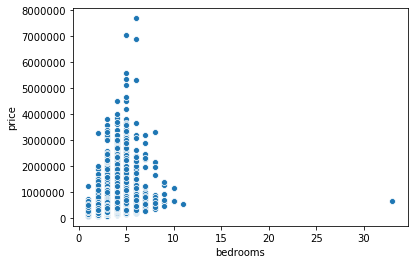

In [11]:
sns.scatterplot(data=df_s1, x="bedrooms", y="price")

There's a house here that has over 30 bedrooms and is priced at a million bucks? That don't look right. I looked back up at the data, there's a house with 33 bedrooms. I'm not sure how you can still call it a house, as opposed to 'hotel'. I may need to drop that one, that might skew the data a little.

In [12]:
df_s1 = df_s1[df_s1.bedrooms != 33]

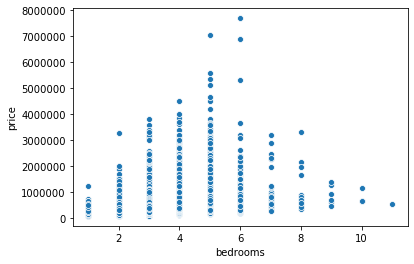

In [13]:
sns.scatterplot(data=df_s1, x="bedrooms", y="price")

Ahhhh, nothing beats some nicely distributed data. Still I find it a little bothersome that there isn't a direct relationship between price and bedrooms. But this wasn't too bad, so let's try another pairing, price and sqft_living:

In [14]:
df_s1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


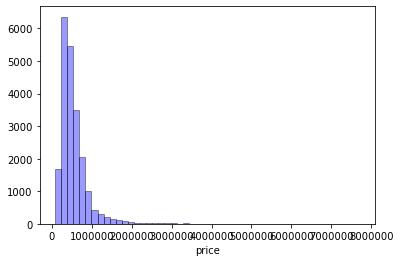

In [15]:
sns.distplot(df_s1['price'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

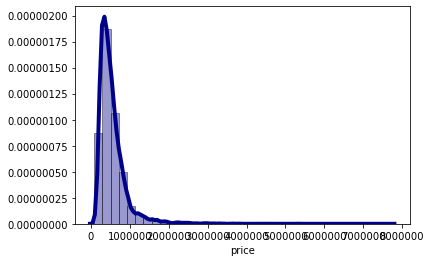

In [16]:
sns.distplot(df_s1['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

So this tells me my data isn't very evenly distributed, I'll have to fix that. Two ways seem pretty acceptable: 1) Log transforming the data, 2) cutting the data off at about 1.5 million. I bet if I cut the data off there that'll look a lot more like a normal distribution.

In [17]:
price_low=df_s1[df_s1.price<=1500000]

In [18]:
price_low

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


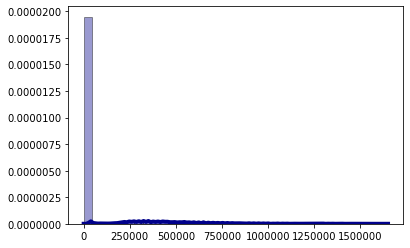

In [27]:
sns.distplot(price_low, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Nope. Seems that didn't work at all. So let's do a simple log transform of the price.

In [13]:
price_log=np.log(price)

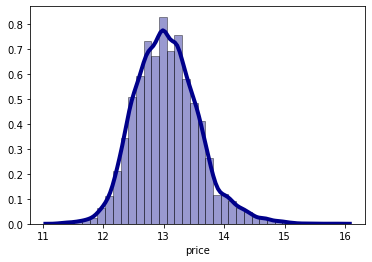

In [14]:
sns.distplot(price_log, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Look at how nice that looks, so nicely distributed. So "normally" distributed. Now the plan is to cut off the price data at 1 standard deviation above the mean.

In [21]:
price_log.describe()

count    21597.000000
mean        13.048211
std          0.526555
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

In [15]:
stdv=.526555
cutoff1=price_log.mean() + stdv
cutoff2=price_log.mean() + (stdv*2)

Just to be safe, I added a second cutoff at 2 standard deviations. So let's look at them:

In [16]:
price_top1=np.exp(cutoff1)
price_top2=np.exp(cutoff2)
print(price_top1)
print(price_top2)

786042.3433634304
1330840.0826993242


Interesting. The cutoffs are either $786,000  or  $1.33 million. Well, I want to keep as much data as possible, so let's use cutoff 2.

In [17]:
price_low=df_s1[df_s1.price<=1330840]
price_hi=df_s1[df_s1.price>1330840]

In [18]:
price_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20869 entries, 0 to 21596
Data columns (total 10 columns):
price          20869 non-null float64
bedrooms       20869 non-null int64
bathrooms      20869 non-null float64
sqft_living    20869 non-null int64
sqft_lot       20869 non-null int64
floors         20869 non-null float64
waterfront     18560 non-null float64
condition      20869 non-null int64
grade          20869 non-null int64
yr_built       20869 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


We really didn't trim that much off, so that's a good thing for the model. Only about 1000 or so.

In [19]:
20869/21597 #how much of the original data we're keeping.

0.9662916145760986

In [20]:
price_low.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.086900e+04,20869.000000,20869.000000,20869.000000,2.086900e+04,20869.000000,18560.000000,20869.000000,20869.000000,20869.000000
mean,4.921810e+05,3.344434,2.070763,2006.091044,1.468600e+04,1.481695,0.003448,3.407351,7.570990,1970.861086
std,2.318026e+05,0.891255,0.722731,806.488218,3.999138e+04,0.537104,0.058622,0.647836,1.073316,29.249913
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.182000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.420000e+05,3.000000,2.250000,1880.000000,7.528000e+03,1.000000,0.000000,3.000000,7.000000,1974.000000
75%,6.179500e+05,4.000000,2.500000,2475.000000,1.040400e+04,2.000000,0.000000,4.000000,8.000000,1996.000000
max,1.330000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,5.000000,12.000000,2015.000000


Next step? Well, I got a nice cutoff for price, let's see if we can do some stuff with it.

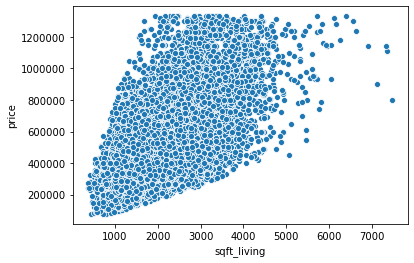

In [21]:
sns.scatterplot(data=price_low, x="sqft_living", y="price")

That's just begging to be linearlly regressed.

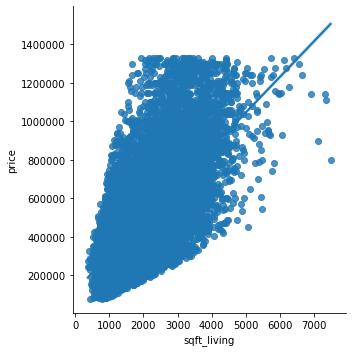

In [22]:
sns.lmplot(x="sqft_living", y="price", data=price_low)
plt.show()

So, just to crawl, let's try a little linear regression with just these 2. First, instantiate it:

In [23]:
lr = LinearRegression()

In [24]:
y = price_low['price'].values
lr.fit(price_low[['sqft_living']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
m = lr.coef_
print(m)

[185.23232919]


In [26]:
b = lr.intercept_
print(b)

120588.0741801149


That looks a bit odd, but we'll go with it for now, let's make some equations and graphs and see how it looks.

In [27]:
X=price_low['sqft_living'].values
y_eq=m*X+b

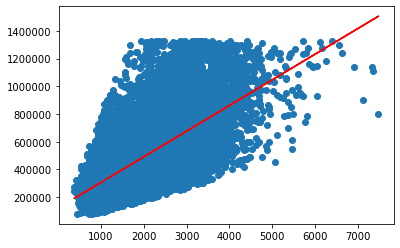

In [28]:
plt.scatter(X, y)
plt.plot(X, y_eq, color='red')
plt.show()

For a simple case, this looks pretty good. There's still more to do, more complexity to add in.

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y, y_eq)

0.4153296223007371

Meh, not great. But like I said, this is crawl, next we'll walk, then run. Next step is to add a little more complexity: sqft AND bedrooms.

In [31]:
att2=['sqft_living','bedrooms']

In [32]:
X=price_low[att2]

In [33]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
m = lr.coef_
print(m)
b = lr.intercept_
print(b)

[   204.82657438 -29495.93420606]
179927.44928716472


In [35]:
preds = lr.predict(X)

In [36]:
r2_score(y, preds)

0.423543662455258

So it seems our R2 score actually dropped as we added these other variables. That sucks.

In [37]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

D:\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     7666.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:14:05   Log-Likelihood:            -2.8167e+05
No. Observations:               20869   AIC:                         5.633e+05
Df Residuals:                   20866   BIC:                         5.634e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.799e+05   4744.683     37.922      0.000    1.71e+05    1.89e+05
sqft_living   204.8266      1.890    108.351      0.000     201.121     208.532
bedrooms     -2.95e+04   1710.596    -17.243      0.000   -3.28e+04   -2.61e+04
==============================================================================
Omnibus:                     2177.873   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3348.059
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                       4.202   Cond. No.                     8.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So it's suggesting there is multicollinearity at work here, and I don't disagree. I think bedrooms, bathrooms and sqft are related. The more bedrooms and/or bathrooms you have, the bigger your house is going to be.
Let's get even more complicated; let's split our columns into continuous and categorical:
So let's plan out our next steps for the next few days:
-Look uo how to deal with colinear variables
-include year built in the model
-split the data, test and train
-Go from there.

In [38]:
att3=['sqft_living','bedrooms','bathrooms','sqft_lot']

In [39]:
X=price_low[att3].values

In [40]:
y = price_low['price'].values
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
m = lr.coef_
print(m)
b = lr.intercept_
print(b)

[ 2.00084338e+02 -3.11301011e+04  1.05074290e+04 -1.26130731e-01]
175000.13342293166


In [42]:
preds = lr.predict(X)
r2_score(y, preds)

0.4245556844227749

Time to start throwing spaghetti against the wall. An R2 score of 42 just isn't going to cut it. So let's try our regression with the log price.

In [43]:
price_low_log=np.log(price_low.price)

In [44]:
y=price_low_log.values

In [45]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
m = lr.coef_
print(m)
b = lr.intercept_
print(b)

[ 3.65304586e-04 -5.32337200e-02  5.09053438e-02 -1.75442585e-07]
12.34269171408627


In [47]:
preds = lr.predict(X)
r2_score(y, preds)

0.4022210995475586

Somehow, we've gotten worse. Let's log more things, the sqft's. We'll put sqft_living, sqft_lot and price into its own dataframe, log those values, and put them back into the original dataframe. Then run a linear regression on that and see what we get.

In [48]:
continuous = ['sqft_living', 'sqft_lot','price']
cont = price_low[continuous]
log_names = [f'{column}_log' for column in cont.columns]

In [49]:
df_log = np.log(cont)
df_log.columns = log_names

In [50]:
scaler = StandardScaler()

df_log_norm = scaler.fit_transform(df_log)

In [51]:
df_log_norm = pd.DataFrame(df_log_norm, columns = df_log.columns)

In [52]:
df_log_norm.head()

,sqft_living_log,sqft_lot_log,price_log
0,-1.117789,-0.368636,-1.485162
1,0.810548,-0.091637,0.420131
2,-2.175311,0.268433,-1.935373
3,0.139286,-0.505012,0.669074
4,-0.242597,0.030542,0.305147


In [53]:
df_pre = pd.concat([df_log_norm, price_low], axis=1)
df_pre.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,3.0,7.0,1955.0
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,1951.0
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,6.0,1933.0
3,0.139286,-0.505012,0.669074,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,1965.0
4,-0.242597,0.030542,0.305147,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,1987.0


So now that I've pretty much decided what variables I want to use, I'm going to drop the others from the dataframe.

In [54]:
to_drop=['floors','waterfront','condition','grade','yr_built']

In [55]:
df_final=df_pre.drop(columns=to_drop)

In [56]:
df_final.describe()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.086900e+04,2.086900e+04,2.086900e+04,2.086900e+04,20869.000000,20869.000000,20869.000000,2.086900e+04
mean,-9.451659e-16,-1.503549e-15,-4.818439e-15,4.921810e+05,3.344434,2.070763,2006.091044,1.468600e+04
std,1.000024e+00,1.000024e+00,1.000024e+00,2.318026e+05,0.891255,0.722731,806.488218,3.999138e+04
min,-3.990919e+00,-3.030577e+00,-3.734425e+00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02
25%,-6.766364e-01,-5.050121e-01,-7.097054e-01,3.182000e+05,3.000000,1.500000,1410.000000,5.000000e+03
50%,3.604850e-02,-4.841765e-02,-2.711710e-03,4.420000e+05,3.000000,2.250000,1880.000000,7.528000e+03
75%,7.172379e-01,3.126264e-01,7.181967e-01,6.179500e+05,4.000000,2.500000,2475.000000,1.040400e+04
max,3.457152e+00,5.966798e+00,2.367255e+00,1.330000e+06,11.000000,7.500000,7480.000000,1.651359e+06


In [57]:
df_final.dropna(inplace=True)

In [58]:
test=['sqft_living_log','sqft_lot_log','bedrooms','bathrooms']

In [59]:
X=df_final[test]
y=df_final.price_log

In [60]:
model = sm.OLS(y, sm.add_constant(X))

D:\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3388.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:14:51   Log-Likelihood:                -23462.
No. Observations:               20175   AIC:                         4.693e+04
Df Residuals:                   20170   BIC:                         4.697e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0345      0.022     -1.574      0.116      -0.078       0.008
sqft_living_log     0.6598      0.006    115.070      0.000       0.649       0.671
sqft_lot_log       -0.1073      0.006    -18.750      0.000      -0.119      -0.096
bedrooms            0.0113      0.007      1.591      0.112      -0.003       0.025
bathrooms          -0.0017      0.009     -0.198      0.843      -0.019       0.016
==============================================================================
Omnibus:                      236.906   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.952
Skew:                          -0.069   Prob(JB):                     3.71e-34
Kurtosis:                       2.595   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3388.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:14:52   Log-Likelihood:                -23462.
No. Observations:               20175   AIC:                         4.693e+04
Df Residuals:                   20170   BIC:                         4.697e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0345      0.022     -1.574      0.116      -0.078       0.008
sqft_living_log     0.6598      0.006    115.070      0.000       0.649       0.671
sqft_lot_log       -0.1073      0.006    -18.750      0.000      -0.119      -0.096
bedrooms            0.0113      0.007      1.591      0.112      -0.003       0.025
bathrooms          -0.0017      0.009     -0.198      0.843      -0.019       0.016
==============================================================================
Omnibus:                      236.906   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.952
Skew:                          -0.069   Prob(JB):                     3.71e-34
Kurtosis:                       2.595   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
lr.fit(X, y)
preds = lr.predict(X)

In [64]:
r2_score(y, preds)

0.4018584144443017

In [65]:
residuals = y-preds

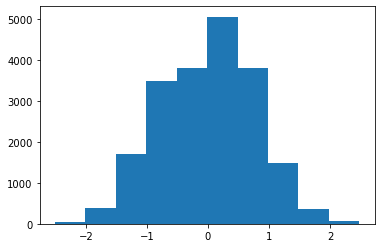

In [66]:
plt.hist(residuals)
plt.show()

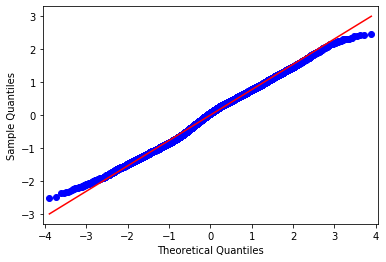

In [72]:
fig = sm.qqplot(residuals, line = 'r')

All that stuff is nice and all, but I still need to get that R2 score up. Let's take a step back and see if we can get some more linear relationships with price going. We can start by looking at the distributions of my variables, we already know the log of the price is a normal distribution.

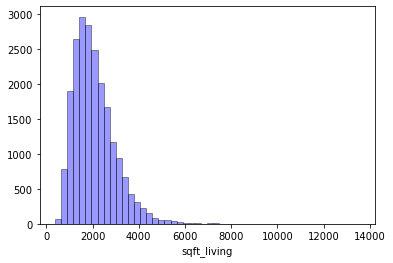

In [67]:
sns.distplot(df_s1['sqft_living'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

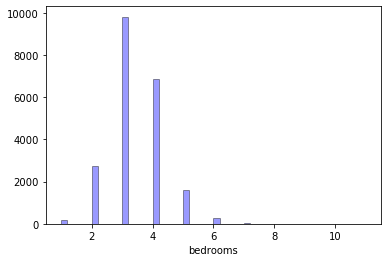

In [76]:
sns.distplot(df_s1['bedrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

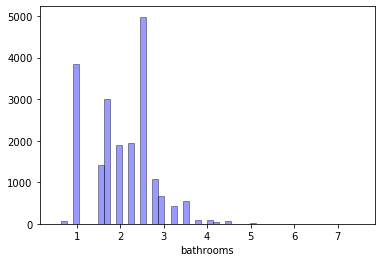

In [77]:
sns.distplot(df_final['bathrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [74]:
df_final['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.25, 1.25, 3.75, 4.75, 5.  , 0.5 , 5.25, 6.75, 7.5 ,
       5.5 , 5.75, 6.5 ])

What's a quarter of a bathroom look like? Or three quarters for that matter? I think I can simplify that some. Make the quarters into halves. I figure 2.25 bathrooms is closer to 2.5 than 2.0, but 3.75 bathrooms would also be closer to 3.4 than to 4. So I'll need to edit this column, more like add another column with just halves.
I have an idea how to do that:

In [68]:
list1=[1,5,9,13,17,21,25,29,33]
list2=[3,7,11,15,19,23,27,31,35]

So these lists are the values when dividing the bathrooms by .25, if your bathrooms are ending in .25 or .75, all I need to do is go over the column see if the value divided by 0.25 yields one of these numbers, if it's in list1, add .25, if it's in list2, subtract .25, otherwise, leave it alone. We'll make a new column for all these values so as to keep the original.

In [76]:
g= len(df_final['bathrooms'])

In [77]:
g

20175

In [82]:
a= df_final['bathrooms'][0]/0.25

In [83]:
a

4.0

In [84]:
df_final.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0
3,0.139286,-0.505012,0.669074,604000.0,4.0,3.00,1960.0,5000.0
4,-0.242597,0.030542,0.305147,510000.0,3.0,2.00,1680.0,8080.0


In [77]:
a in list1

False

In [78]:
a in list2

False

In [69]:
df_final['bath_haf']=df_final['bathrooms']

In [70]:
df_final['bath_haf']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
20864    2.25
20865    2.25
20866    2.50
20867    1.50
20868    2.50
Name: bath_haf, Length: 20175, dtype: float64

In [71]:
df_final['bath_haf'][0]/0.25

4.0

In [72]:
for i in df_final.index:
    a= df_final['bath_haf'][i]
    b= a/.25
    if b in list1:
        df_final['bath_haf'][i]=a + 0.25
    elif b in list2:
        df_final['bath_haf'][i]= a - 0.25
    else:
        df_final['bath_haf'][i]= a

In [73]:
df_final['bath_haf'].unique()

array([1. , 2.5, 3. , 2. , 4.5, 1.5, 3.5, 4. , 0.5, 5. , 5.5, 6.5, 7.5])

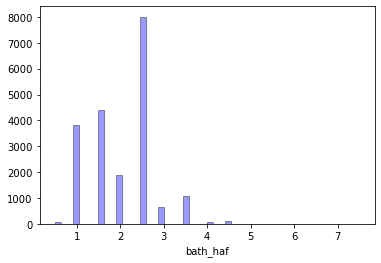

In [74]:
sns.distplot(df_final['bath_haf'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

That's a little better.

In [75]:
test2=['sqft_living_log','sqft_lot_log','bedrooms','bath_haf']

In [76]:
X=df_final[test2]
y=df_final.price_log

In [77]:
lr.fit(X, y)
preds = lr.predict(X)

In [78]:
r2_score(y, preds)

0.4018609379250867

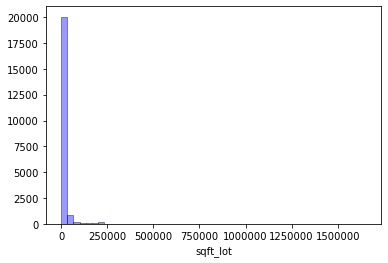

In [79]:
sns.distplot(df_s1['sqft_lot'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

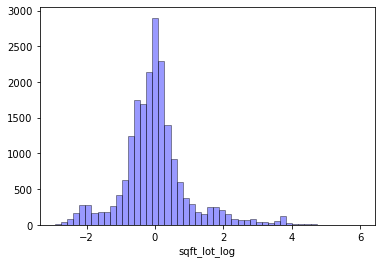

In [96]:
sns.distplot(df_final['sqft_lot_log'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

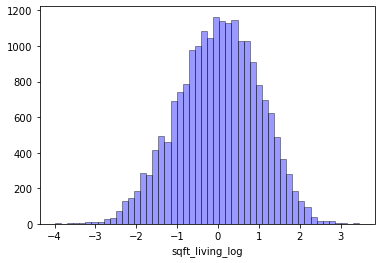

In [88]:
sns.distplot(df_final['sqft_living_log'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

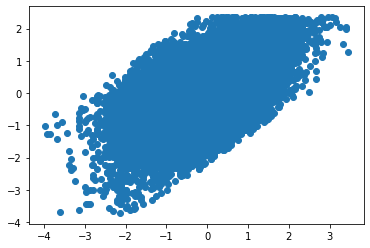

In [98]:
q=df_final['sqft_living_log']
u=df_final['price_log']
plt.scatter(q, u)

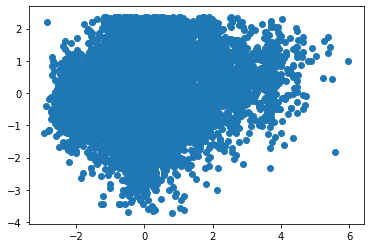

In [99]:
plt.scatter(df_final['sqft_lot_log'],u)

So the problem seems to be bedrooms and bathrooms, they don't seem to want to fit into the model.

In [80]:
test3=['sqft_living_log','sqft_lot_log']

In [81]:
X=df_final[test3]
y=df_final.price_log

In [82]:
lr.fit(X, y)
preds = lr.predict(X)
r2_score(y, preds)

0.40176779261215945

In [83]:
test4=['sqft_living_log','bathrooms','bedrooms','sqft_lot_log']
X=df_final[test4]
y=df_final.price_log

In [84]:
lr.fit(X, y)
preds = lr.predict(X)
r2_score(y, preds)

0.4018584144443017

Desperate times, desperate measures, time to use some scalers:

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [86]:
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()
robscaler = RobustScaler()

In [87]:
X_scaled_std = stdscaler.fit_transform(X['bathrooms'].values.reshape(-1, 1))
X_scaled_mm = minmaxscaler.fit_transform(X['bathrooms'].values.reshape(-1, 1))
X_scaled_rob = robscaler.fit_transform(X['bathrooms'].values.reshape(-1, 1))

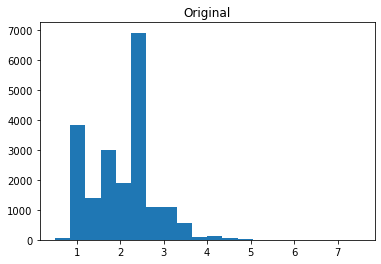

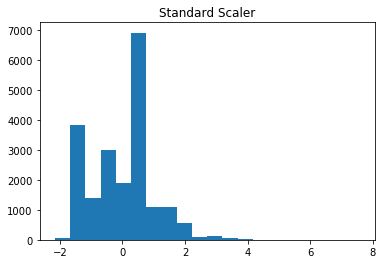

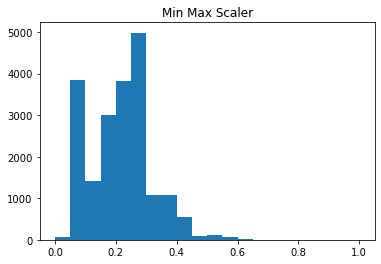

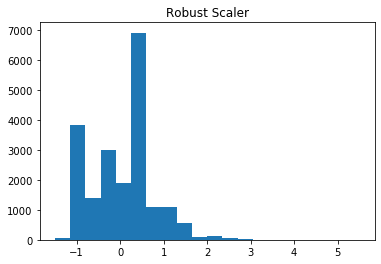

In [88]:
scalers = {'Original': X['bathrooms'].values, 
           'Standard Scaler': X_scaled_std, 
           'Min Max Scaler': X_scaled_mm,
           'Robust Scaler': X_scaled_rob}
for title, data in scalers.items():
    plt.hist(data, bins=20)
    plt.title(f"{title}")
    plt.show()

In [89]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [90]:
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3388.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:16:39   Log-Likelihood:                -23462.
No. Observations:               20175   AIC:                         4.693e+04
Df Residuals:                   20170   BIC:                         4.697e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.005      0.045      0.964      -0.010       0.011
x1             0.6588      0.006    115.070      0.000       0.648       0.670
x2            -0.0013      0.006     -0.198      0.843      -0.014       0.011
x3             0.0101      0.006      1.591      0.112      -0.002       0.023
x4            -0.1075      0.006    -18.750      0.000      -0.119      -0.096
==============================================================================
Omnibus:                      236.906   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.952
Skew:                          -0.069   Prob(JB):                     3.71e-34
Kurtosis:                       2.595   Cond. No.                         1.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
X

,sqft_living_log,bathrooms,bedrooms,sqft_lot_log
0,-1.117789,1.00,3.0,-0.368636
1,0.810548,2.25,3.0,-0.091637
2,-2.175311,1.00,2.0,0.268433
3,0.139286,3.00,4.0,-0.505012
4,-0.242597,2.00,3.0,0.030542
...,...,...,...,...
20864,-0.474293,2.25,3.0,-2.163533
20865,0.546319,2.25,4.0,-0.336900
20866,-1.478766,2.50,4.0,-1.966026
20867,-0.363467,1.50,3.0,-1.329602


Let's check for some colinearity between bedrooms and bathrooms. I'm pretty sure there will be.

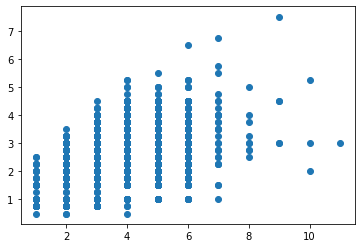

In [100]:
plt.scatter(df_final['bedrooms'],df_final['bathrooms'])

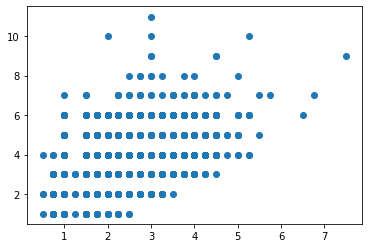

In [123]:
plt.scatter(df_final['bathrooms'],df_final['bedrooms'])

In [130]:
df_final.describe()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf
count,20118.000000,20118.000000,20118.000000,2.011800e+04,20118.000000,20118.000000,20118.000000,2.011800e+04,20118.000000
mean,0.001091,0.004489,-0.000214,4.902058e+05,3.331047,2.048576,1993.443782,1.495725e+04,2.025475
std,0.998260,1.001896,1.000553,2.316542e+05,0.864057,0.712110,795.447885,4.045743e+04,0.743472
min,-3.990919,-2.924226,-3.734425,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.500000
25%,-0.676636,-0.503228,-0.707678,3.150000e+05,3.000000,1.500000,1400.000000,5.100000e+03,1.500000
50%,0.036049,-0.043684,-0.002712,4.400000e+05,3.000000,2.000000,1870.000000,7.620000e+03,2.000000
75%,0.712228,0.317549,0.714712,6.150000e+05,4.000000,2.500000,2450.000000,1.051625e+04,2.500000
max,3.457152,5.966798,2.367255,1.330000e+06,6.000000,5.000000,7350.000000,1.651359e+06,5.000000


Let's do some more cutoffs. Let's cap the bedrooms at 6, and bathrooms at 5. The Brady Bunch lived in a 4 bedroom house.

In [101]:
df_final = df_final[df_final.bedrooms <= 6]

In [102]:
df_final = df_final[df_final.bathrooms <= 5]

How can I turn beds and baths into 1 variable, and put that in my model? What if I did a linear regression of the beds and baths, used that as my variable.

In [103]:
y = df_final['bathrooms'].values
X= df_final[['bedrooms']]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
preds = lr.predict(X)

In [107]:
r2_score(y, preds)

0.2590854263404009

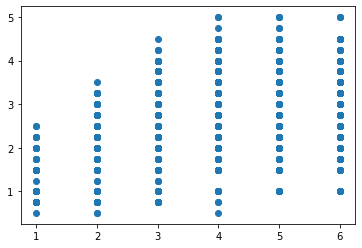

In [108]:
plt.scatter(df_final['bedrooms'],df_final['bathrooms'])

In [109]:
df_final['bath_plus']=np.exp(df_final['bathrooms'])

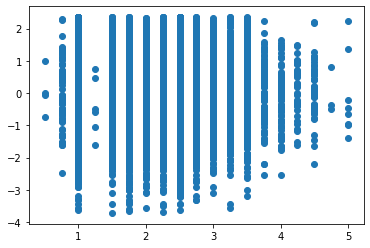

In [110]:
plt.scatter(df_final['bathrooms'],df_final['price_log'])

In [111]:
df_final.drop('bath_plus',axis=1, inplace=True)

In [112]:
df_final['price_100']=df_final['price']/10000

In [166]:
df_final

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,price_100
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0,1.0,22.19
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0,2.5,53.80
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0,1.0,18.00
3,0.139286,-0.505012,0.669074,604000.0,4.0,3.00,1960.0,5000.0,3.0,60.40
4,-0.242597,0.030542,0.305147,510000.0,3.0,2.00,1680.0,8080.0,2.0,51.00
...,...,...,...,...,...,...,...,...,...,...
20864,-0.474293,-2.163533,-0.444179,565000.0,3.0,2.25,1540.0,1005.0,2.5,56.50
20865,0.546319,-0.336900,-0.217513,765000.0,4.0,2.25,2030.0,2222.0,2.5,76.50
20866,-1.478766,-1.966026,-0.206242,644000.0,4.0,2.50,3310.0,4839.0,2.5,64.40
20867,-0.363467,-1.329602,-0.217513,461000.0,3.0,1.50,1270.0,1416.0,1.5,46.10


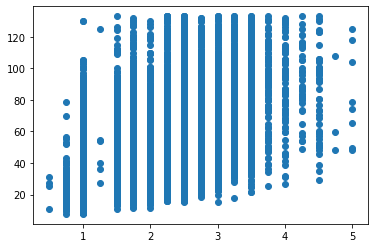

In [167]:
plt.scatter(df_final['bathrooms'],df_final['price_100'])

In [113]:
y = df_final['price'].values
X= df_final[['bedrooms']]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
preds = lr.predict(X)
r2_score(y, preds)

0.09842077135571392

In [115]:
df_final['bedrooms'].unique()

array([3., 2., 4., 5., 1., 6.])

In [116]:
df_final['bedrooms']

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
20864    3.0
20865    4.0
20866    4.0
20867    3.0
20868    5.0
Name: bedrooms, Length: 20118, dtype: float64

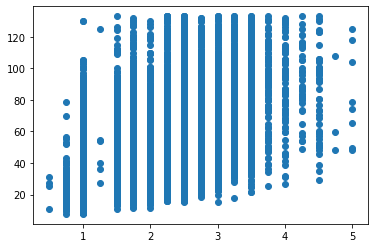

In [117]:
plt.scatter(df_final['bathrooms'],df_final['price_100'])

In [118]:
df_final.groupby(['bedrooms','bath_haf']).size()

bedrooms  bath_haf
1.0       0.5           28
          1.0          135
          1.5           14
          2.0            5
          2.5            6
2.0       0.5           26
          1.0         1552
          1.5          573
          2.0          210
          2.5          284
          3.0           12
          3.5            7
3.0       0.5           16
          1.0         1777
          1.5         2661
          2.0         1023
          2.5         3455
          3.0          166
          3.5          276
          4.0            7
          4.5            4
4.0       0.5            3
          1.0          325
          1.5          968
          2.0          521
          2.5         3614
          3.0          293
          3.5          502
          4.0           36
          4.5           33
          5.0            2
5.0       1.0           43
          1.5          180
          2.0          109
          2.5          565
          3.0          143
         

This might help us. This shows the most common number of bathrooms given the number of bedrooms. In fact, it looks like 2.5 bathrooms seems to be the norm. So here's what we can do: Make yet another column, and that column will be bathrooms, but it'll only have the 3 most common values given the number of bedrooms.

In [119]:
df_final['bath_3']=df_final['bath_haf']

In [120]:
for i in df_final.index:
    group13=[1,1.5,2.5]
    group4=[1.5,2,2.5]
    group5=[1.5,2.5,3.5]
    group6=[2.5,3,3.5]
    a= df_final['bath_3'][i]
    b= df_final['bedrooms'][i]
    if b == 2 and a not in group13:
        df_final['bath_3'][i]= None
    elif b == 3 and a not in group13:
        df_final['bath_3'][i]= None
    elif b == 4 and a not in group4:
        df_final['bath_3'][i]= None
    elif b == 5 and a not in group5:
        df_final['bath_3'][i]= None
    elif b == 6 and a not in group6:
        df_final['bath_3'][i]= None    

In [121]:
df_final.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,price_100,bath_3
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0,1.0,22.19,1.0
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0,2.5,53.80,2.5
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0,1.0,18.00,1.0
3,0.139286,-0.505012,0.669074,604000.0,4.0,3.00,1960.0,5000.0,3.0,60.40,NaN
4,-0.242597,0.030542,0.305147,510000.0,3.0,2.00,1680.0,8080.0,2.0,51.00,NaN


In [122]:
df_fin=df_final.dropna()

In [123]:
df_fin.describe()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,price_100,bath_3
count,16731.000000,16731.000000,16731.000000,1.673100e+04,16731.000000,16731.000000,16731.00000,1.673100e+04,16731.000000,16731.000000,16731.000000
mean,0.000201,0.008051,-0.001213,4.737150e+05,3.283486,1.956996,1930.43530,1.399446e+04,1.925737,47.371496,1.925737
std,0.997762,0.996267,1.001896,2.185500e+05,0.854524,0.629373,736.23415,3.388182e+04,0.656408,21.854998,0.656408
min,-3.924853,-2.924226,-3.734425,7.800000e+04,1.000000,0.500000,370.00000,5.200000e+02,0.500000,7.800000,0.500000
25%,-0.676636,-0.501670,-0.717834,3.100000e+05,3.000000,1.500000,1370.00000,5.178500e+03,1.500000,31.000000,1.500000
50%,0.036049,-0.043684,-0.005147,4.300000e+05,3.000000,2.000000,1840.00000,7.675000e+03,2.000000,43.000000,2.000000
75%,0.712228,0.320854,0.723586,5.950000e+05,4.000000,2.500000,2390.00000,1.044000e+04,2.500000,59.500000,2.500000
max,3.457152,5.966798,2.367255,1.330000e+06,6.000000,3.750000,7350.00000,1.164794e+06,3.500000,133.000000,3.500000


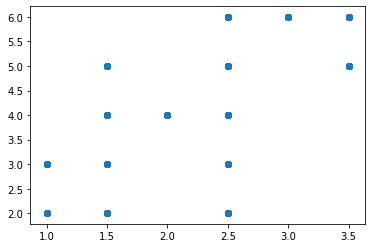

In [191]:
plt.scatter(df_fin['bath_3'],df_fin['bedrooms'])

In [124]:
y = df_fin['bath_3'].values
X= df_fin[['bedrooms']]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
preds = lr.predict(X)
r2_score(y, preds)

0.3131370670541668

Ok, so by doing this, I've tripled my R2 score regarding beds and baths

In [126]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16731 entries, 0 to 20868
Data columns (total 11 columns):
sqft_living_log    16731 non-null float64
sqft_lot_log       16731 non-null float64
price_log          16731 non-null float64
price              16731 non-null float64
bedrooms           16731 non-null float64
bathrooms          16731 non-null float64
sqft_living        16731 non-null float64
sqft_lot           16731 non-null float64
bath_haf           16731 non-null float64
price_100          16731 non-null float64
bath_3             16731 non-null float64
dtypes: float64(11)
memory usage: 1.5 MB


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [196]:
16543/21597

0.7659860165763763

So, we ended up removing about 25% of the original data, but if this works then it'll be worth it.

In [128]:
att4=['bedrooms','bath_3','sqft_living_log','sqft_lot_log']
y=df_fin['price_log']
X=df_fin[att4]

In [129]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
preds = lr.predict(X)
r2_score(y, preds)

0.4026580033819309

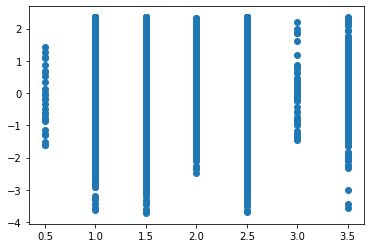

In [131]:
plt.scatter(df_fin['bath_3'],df_fin['price_log'])

In [132]:
df_fin

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,price_100,bath_3
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0,1.0,22.190,1.0
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0,2.5,53.800,2.5
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0,1.0,18.000,1.0
6,-0.191516,-0.158793,-1.165059,257500.0,3.0,2.25,1715.0,6819.0,2.5,25.750,2.5
7,-1.383472,0.235710,-0.895667,291850.0,3.0,1.50,1060.0,9711.0,1.5,29.185,1.5
...,...,...,...,...,...,...,...,...,...,...,...
20864,-0.474293,-2.163533,-0.444179,565000.0,3.0,2.25,1540.0,1005.0,2.5,56.500,2.5
20865,0.546319,-0.336900,-0.217513,765000.0,4.0,2.25,2030.0,2222.0,2.5,76.500,2.5
20866,-1.478766,-1.966026,-0.206242,644000.0,4.0,2.50,3310.0,4839.0,2.5,64.400,2.5
20867,-0.363467,-1.329602,-0.217513,461000.0,3.0,1.50,1270.0,1416.0,1.5,46.100,1.5


In [133]:
att5=['sqft_living']
y=df_fin['price']
X=df_fin[att5]

In [134]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
preds = lr.predict(X)
r2_score(y, preds)

0.36984663355734293

In [136]:
att6=['sqft_lot_log']
y=df_fin['price_log']
X=df_fin[att6]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
preds = lr.predict(X)
r2_score(y, preds)

0.008955494006984255

In [138]:
att7=['sqft_lot']
y=df_fin['price']
X=df_fin[att7]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
preds = lr.predict(X)
r2_score(y, preds)

0.004726533123860177

So my variables are:sqft_living, sqft_lot, bedrooms and bathrooms.

In [140]:
att_1=['bedrooms']
y=df_fin['price']
X=df_fin[att_1]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
preds = lr.predict(X)
r2_score(y, preds)

0.10142270009085119

In [142]:
att_2=['bath_3']
y=df_fin['price']
X=df_fin[att_2]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
preds = lr.predict(X)
r2_score(y, preds)

0.1604912291687941

In [160]:
att_3=['sqft_living']
y=df_fin['price']
X=df_fin[att4]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
preds = lr.predict(X)
r2_score(y, preds)

0.17350553445859962

So let's try the train-test split:

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [163]:
len(X_test) + len(X_train) == len(X)

True

In [164]:
scaler = StandardScaler()

In [165]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")

print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")


Training Scores:
R2: 0.17658887493395237
Testing Scores:
R2: 0.16227605574188841


In [155]:
pip install eli5

In [157]:
import eli5

In [168]:
eli5.show_weights(lr, feature_names=list(X.columns))

Weight?,Feature
+470685.143,<BIAS>
+70102.634,bath_3
+31269.392,bedrooms
+85.658,sqft_lot_log
-173.181,sqft_living_log


In [171]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.17658887493395237
Mean Absolute Error: 154152.30131673024
---
Testing Scores:
R2: 0.16227605574188841
Mean Absolute Error: 159574.16803459308
Root Mean Squared Error V1: 203247.85967638547
Root Mean Squared Error V2: 41309692463.031685


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [176]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [177]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]

In [178]:
print(vif_data)

           feature        VIF
0         bedrooms  13.279275
1           bath_3  13.280561
2  sqft_living_log   1.105705
3     sqft_lot_log   1.107506


Now I'll need to look up what to do with this.

In [179]:
df_fin['bb']=df_fin['bedrooms'] + df_fin['bathrooms']

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
df_fin

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,price_100,bath_3,bb
0,-1.117789,-0.368636,-1.485162,221900.0,3.0,1.00,1180.0,5650.0,1.0,22.190,1.0,4.00
1,0.810548,-0.091637,0.420131,538000.0,3.0,2.25,2570.0,7242.0,2.5,53.800,2.5,5.25
2,-2.175311,0.268433,-1.935373,180000.0,2.0,1.00,770.0,10000.0,1.0,18.000,1.0,3.00
6,-0.191516,-0.158793,-1.165059,257500.0,3.0,2.25,1715.0,6819.0,2.5,25.750,2.5,5.25
7,-1.383472,0.235710,-0.895667,291850.0,3.0,1.50,1060.0,9711.0,1.5,29.185,1.5,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
20864,-0.474293,-2.163533,-0.444179,565000.0,3.0,2.25,1540.0,1005.0,2.5,56.500,2.5,5.25
20865,0.546319,-0.336900,-0.217513,765000.0,4.0,2.25,2030.0,2222.0,2.5,76.500,2.5,6.25
20866,-1.478766,-1.966026,-0.206242,644000.0,4.0,2.50,3310.0,4839.0,2.5,64.400,2.5,6.50
20867,-0.363467,-1.329602,-0.217513,461000.0,3.0,1.50,1270.0,1416.0,1.5,46.100,1.5,4.50


In [181]:
bb_test=['sqft_living_log','sqft_lot_log','bb']

In [184]:
y=df_fin['price_log']
X=df_fin[bb_test]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
preds = lr.predict(X)
r2_score(y, preds)

0.40260571265462886

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [187]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [188]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.40238726890828724
Mean Absolute Error: 0.6360828622504685
---
Testing Scores:
R2: 0.40312926844689845
Mean Absolute Error: 0.6371330869663714
Root Mean Squared Error V1: 0.7771113440347136
Root Mean Squared Error V2: 0.603902041027439


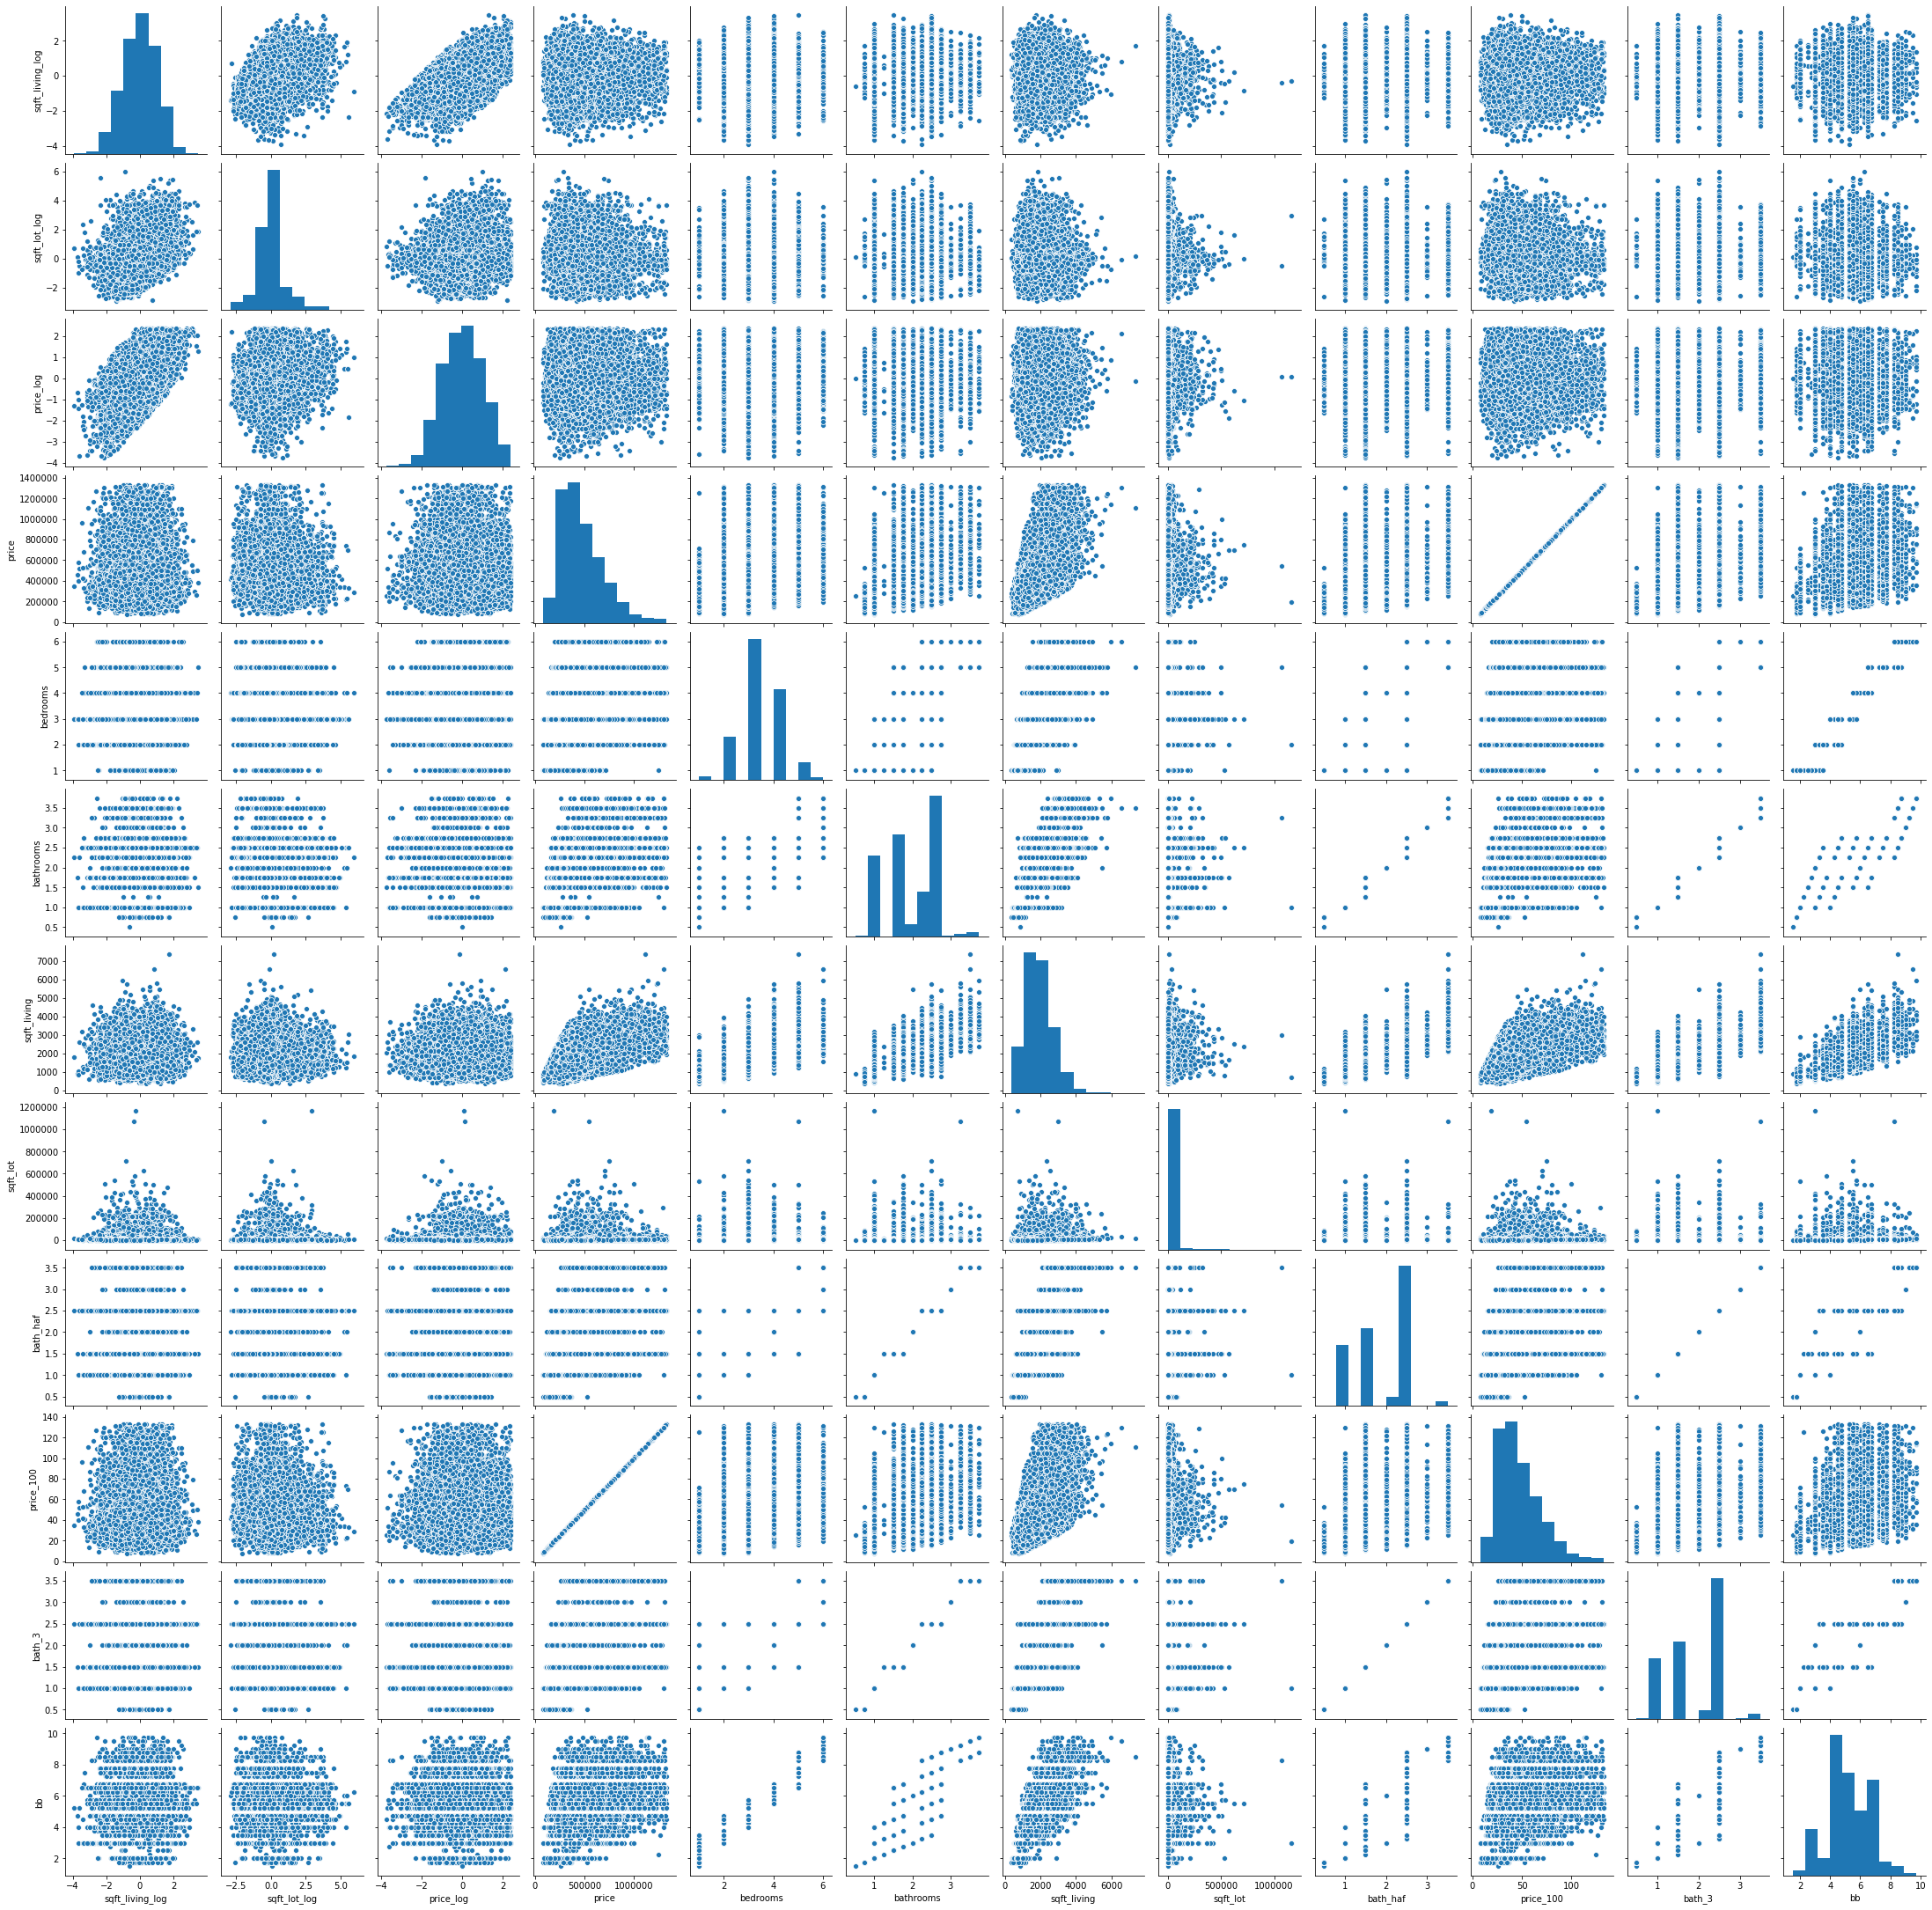

In [190]:
sns.pairplot(df_fin)